# Tabular Kaggle Project

Guideline for steps for the Kaggle Tabular Project. You will "turn in" a GitHub repository, modeled after [Project Template](https://github.com/UTA-DataScience/ProjectTempate) on the day of the final, Friday, May 2 at 11 – 1:30 pm. During the final period we will have about 5 minutes to go over your project and your results.

You can find a list of possible Tabular datasets here on [Excel File in Teams](https://mavsuta.sharepoint.com/:x:/r/teams/Course_2252_data_3402_001-NLyiqHJ5btv8Y/Shared%20Documents/General/Kaggle%20Tabular%20Datasets.xlsx?d=w34cdd3378d1146a2ab63700189a8c5b5&csf=1&web=1&e=6ASD5s). You are not limited to these datasets. If you find a Kaggle challenge not listed that you would like to attempt, please go check with Dr. Farbin to make sure it is viable.

This notebook outlines the steps you should follow. The file(s) in the GitHub repository should contain these steps. Note that you will be only considering classification projects.

## Define Project

* Provide Project link.
* Short paragraph describing the challenge. 
* Briefly describe the data.


### Project Link: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign?resource=download

Challenge description: A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

## ***MEANING OF COLUMN NAMES***
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer enrolment with the company
* Education - customer level of education
* Marital - customer marital status
* Kidhome - number of small children in customer household
* Teenhome - number of teenagers in customer household
* Income - customer yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company web site
* NumWebVisitsMonth - number of visits to company web site in the last month
* Recency - number of days since the last purchase

In [194]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score,  roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

## Data Loading and Initial Look

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [195]:
# Load the dataset
data = pd.read_excel("marketing_campaign.xlsx")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [196]:
# Number of rows and columns
print("(Rows, Columns):")
print(data.shape)

(Rows, Columns):
(2240, 29)


In [197]:
# Number of null values in each column
print("Null values in each column:\n")
print(data.isnull().sum())

Null values in each column:

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


* There are only missing values in the 'Income' column. We will replace these with the median income.

In [198]:
# Data types of each column
print("Column datatypes:\n")
print(data.dtypes)

Column datatypes:

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [199]:
# For 'object' columns we will extract the categories
cat_cols=['Education','Marital_Status']
print("Categorical values for object columns:\n")
for i in cat_cols:
    print(f"Unique categories in {i} column:")
    print(data[i].unique())

Categorical values for object columns:

Unique categories in Education column:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique categories in Marital_Status column:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


* We can use one-hot encoding for both categorical columns.

In [200]:
# General statistics, including ranges of numeric values
print("General data statistics. \nNumeric data ranges are shown in the 'min' and 'max' rows:\n")
print(data.describe())

General data statistics. 
Numeric data ranges are shown in the 'min' and 'max' rows:

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.

* The data ranges for almost all numeric columns are appropriate. However, the 'Year_Birth' column has a minimum of 1893 which would make that individual 131/132 years old, which is not reasonable. We will remove these outlier rows.

In [201]:
# Indentify outliers in each column

# Outlier Detection using IQR
data_numeric = data.select_dtypes(['int64','float64'])
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).sum()
outliers_percent = (outliers/len(data_numeric))*100

print("\nOutliers per Feature:\n\n",outliers)
print("\nOutliers Percent per Feature:\n\n",outliers_percent)

# Create a dictionary to store outliers for each column
print("\n\nValues of Outliers per Feature:\n")
outlier_values = {}

for column in data_numeric.columns:
    # Calculate IQR for the column
    Q1 = data_numeric[column].quantile(0.25)
    Q3 = data_numeric[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = data_numeric[
        (data_numeric[column] < (Q1 - 1.5 * IQR)) |
        (data_numeric[column] > (Q3 + 1.5 * IQR))
    ][column]

    # Store as a list
    outlier_values[column] = outliers.tolist()

# Print outliers for each column
for column, values in outlier_values.items():
    if len(values)==0:         # checks if column has no outliers
      continue
    elif values.count(1)==len(values):        # checks if column outliers are all 1
      continue
    print(f"'{column}': {values}")


Outliers per Feature:

 ID                       0
Year_Birth               3
Income                   8
Kidhome                  0
Teenhome                 0
Recency                  0
MntWines                35
MntFruits              227
MntMeatProducts        175
MntFishProducts        223
MntSweetProducts       248
MntGoldProds           207
NumDealsPurchases       86
NumWebPurchases          4
NumCatalogPurchases     23
NumStorePurchases        0
NumWebVisitsMonth        8
AcceptedCmp3           163
AcceptedCmp4           167
AcceptedCmp5           163
AcceptedCmp1           144
AcceptedCmp2            30
Complain                21
Z_CostContact            0
Z_Revenue                0
Response               334
dtype: int64

Outliers Percent per Feature:

 ID                      0.000000
Year_Birth              0.133929
Income                  0.357143
Kidhome                 0.000000
Teenhome                0.000000
Recency                 0.000000
MntWines                1.562

* Define outliers: An outlier, in a data set, is a data point that differs significantly from the rest of the values in the data set.
* Again, only the 'Year_Birth' columns show data range issues we will handle the outliers appropriately.

In [202]:
# Check for class imbalance
category_counts = data['Response'].value_counts()
category_percent = data['Response'].value_counts(normalize=True) * 100
print(f"\nCounts:\n{category_counts}")
print(f"\nPercentage:\n{category_percent}")



Counts:
Response
0    1906
1     334
Name: count, dtype: int64

Percentage:
Response
0    85.089286
1    14.910714
Name: proportion, dtype: float64


* The categorical variables are imbalanced. We will fix this by over sampling the underepresented category.

How is target encoded? The Target variable seems to be one-hot encoded, using 0's and 1's to represent 'No' and 'Yes'.

## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

In [203]:
# Fill missing values
data=data.fillna(0)

# Separate features and target
X = data.drop(['Response','Dt_Customer','ID','Year_Birth','Education', 'Marital_Status', 'Z_CostContact', 'Z_Revenue'], axis=1)
y = data['Response']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
data_scaled = pd.DataFrame(X_scaled, columns=X.columns)

data_scaled

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,0.251939,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
1,-0.208699,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
2,0.778231,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
3,-0.978043,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
4,0.257992,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.372429,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,...,1.769263,0.115638,-0.550785,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282
2236,0.481437,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,...,1.409304,-0.226541,-0.243114,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282
2237,0.206750,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,...,-0.750450,0.115638,2.218248,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282
2238,0.685744,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,...,0.689386,0.799996,1.295237,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282


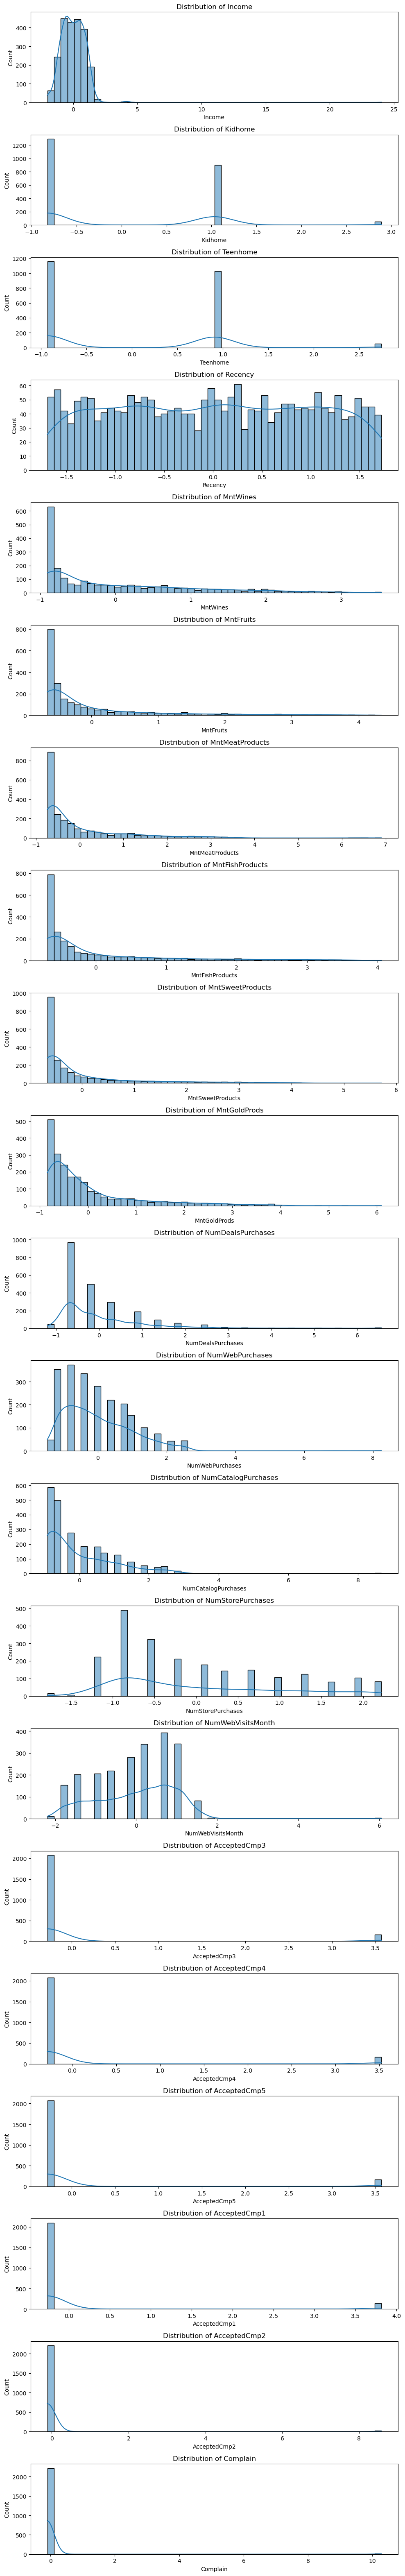

In [204]:
# Separate features and target
features = data_scaled
target = y

# Create one subplot per feature, stacked vertically
fig, axes = plt.subplots(len(features.columns), 1, figsize=(10, len(features.columns) * 3))

# If only one feature, axes is not an array — make it a list
if len(features.columns) == 1:
    axes = [axes]

for i, feature in enumerate(features.columns):
    sns.histplot(data=features, x=feature, kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

# Adjust layout
plt.tight_layout()
plt.show()

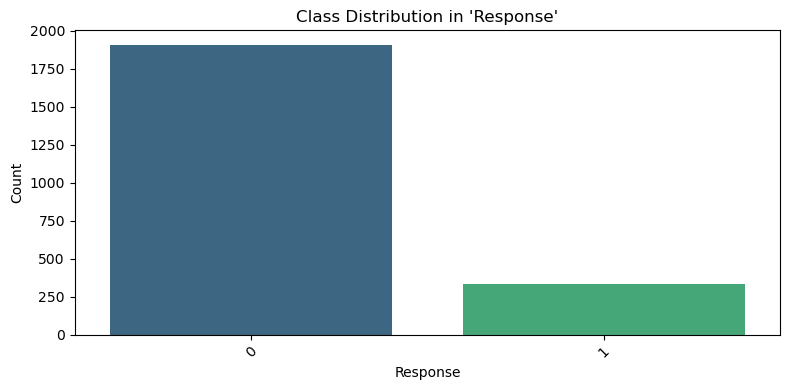

In [205]:
# Show target class imbalance
category_counts = data['Response'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette="viridis", legend=False)
plt.title(f"Class Distribution in 'Response'")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation Heatmap:


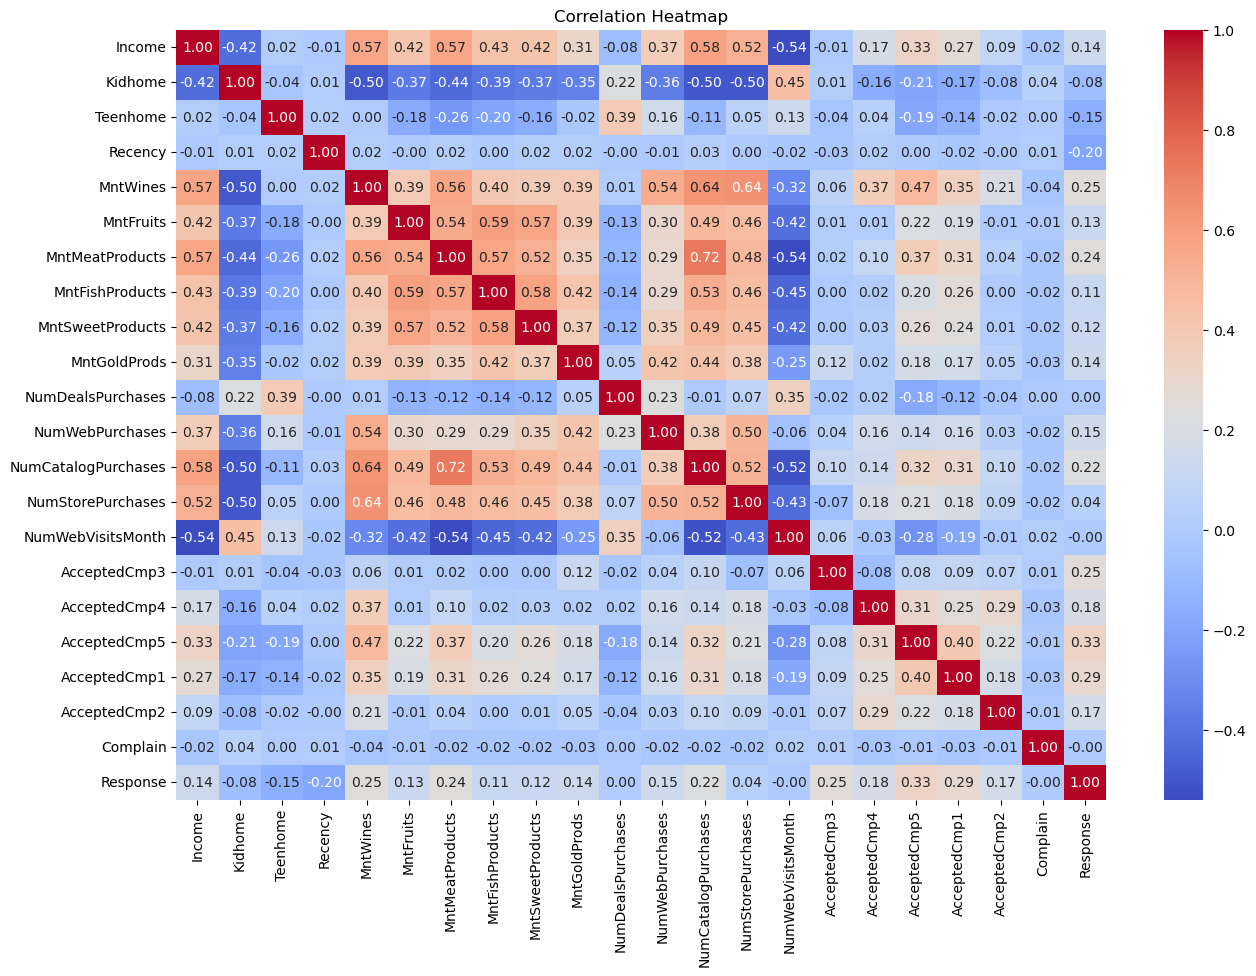

In [206]:
data_nums=data[['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']]

print("\nCorrelation Heatmap:")
plt.figure(figsize=(15, 10))
sns.heatmap(data_nums.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [207]:
# Consolidate 'Marital_Status' categories less than 1%
data.loc[data['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Other'
data.loc[data['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Other'
data.loc[data['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Other'

# Replace outlier birth years with median birth year
median_birth_year = data.loc[data['Year_Birth'],'Year_Birth'].median()
data.loc[data['Year_Birth'] < 1925, 'Year_Birth'] = median_birth_year         # Chose 1925 so that no customer is over 100 years old

In [208]:
# Add new features
# Age
data['Age'] = 2024-data['Year_Birth']        # 2024 since we are less than halfway through 2025, we'll assume most birthdays have not passed
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
# How long has customer been member
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Customer_Years'] = (pd.to_datetime('today') - data['Dt_Customer']).dt.days // 365
# Other features
data['TotalSpend'] = data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
data['SpendToIncomeRatio'] = data['TotalSpend'] / (data['Income'] + 1)

# One-hot Encode categorical variables
data = pd.get_dummies(data, columns=['Education','Marital_Status','AgeGroup'])
data.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Customer_Years', 'TotalSpend', 'SpendToIncomeRatio',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Other',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'AgeGroup_<30', 'AgeGroup_30-40',
       'AgeGroup_40-50', 'AgeGroup_50-60', 'AgeGroup_60+'],
      dtype='object')

In [209]:
# Manually encode categorical variables
object_columns=['Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Other',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'AgeGroup_<30', 'AgeGroup_30-40',
       'AgeGroup_40-50', 'AgeGroup_50-60', 'AgeGroup_60+']
for i in object_columns:
    data[i] = data[i].astype(int)


# Other features
data['WinesPurchasesRatio'] = data['MntWines'] / (data['NumCatalogPurchases'])
data['Cmp3GoldInteraction'] = data['AcceptedCmp3'] * data['MntGoldProds']
data['Cmp5WinesInteraction'] = data['AcceptedCmp5'] * data['MntWines']
data['Cmp1Cmp5Interaction'] = data['AcceptedCmp1'] * data['AcceptedCmp5']

In [210]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data=data.fillna(0)

In [211]:
data

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Widow,AgeGroup_<30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60+,WinesPurchasesRatio,Cmp3GoldInteraction,Cmp5WinesInteraction,Cmp1Cmp5Interaction
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,0,0,0,1,63.500000,0,0,0
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,0,0,1,11.000000,0,0,0
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,1,0,213.000000,0,0,0
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,1,0,0,0,0.000000,0,0,0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,1,0,0,57.666667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,2013-06-13,46,709,43,182,...,0,0,0,0,1,0,236.333333,0,0,0
2236,4001,1946,64014.0,2,1,2014-06-10,56,406,0,30,...,0,0,0,0,0,1,203.000000,0,0,0
2237,7270,1981,56981.0,0,0,2014-01-25,91,908,48,217,...,0,0,0,1,0,0,302.666667,0,0,0
2238,8235,1956,69245.0,0,1,2014-01-24,8,428,30,214,...,0,0,0,0,0,1,85.600000,0,0,0


## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


In [212]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Oversample minority class
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [213]:
# Using a more compact form of each model to reduce bulk of file
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

# 3. Train and evaluate
print("\n=== Model Comparison ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {report['1']['precision']:.4f}")
    print(f"Recall:    {report['1']['recall']:.4f}")
    print(f"F1-Score:  {report['1']['f1-score']:.4f}")


=== Model Comparison ===

Logistic Regression
Accuracy:  0.8065
Precision: 0.4148
Recall:    0.7300
F1-Score:  0.5290

Random Forest
Accuracy:  0.8839
Precision: 0.6618
Recall:    0.4500
F1-Score:  0.5357

SVM
Accuracy:  0.8318
Precision: 0.4532
Recall:    0.6300
F1-Score:  0.5272

KNN
Accuracy:  0.7872
Precision: 0.3799
Recall:    0.6800
F1-Score:  0.4875


In [214]:
# Hyperparameter tuning (example: Random Forest)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_model = grid.best_estimator_

Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


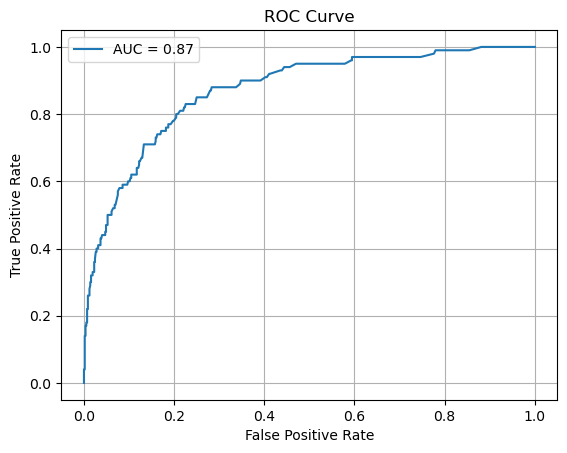

In [215]:
# Confusion Matrix & ROC Curve
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()